<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Juan Quilapi
- Angelo Muñoz


### **Link de repositorio de GitHub:** `https://github.com/FrinyildV/Entregas_MDS_7202`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [2]:
df.shape

(70692, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [5]:
!pip install xgboost

Creando el pandas profiling para ver las distribuciones

In [6]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=806635de8bed485119a7ec5a3741e9b8dfc6924f57bad4af3c838ed70a4b0653
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [7]:
!pip install ydata_profiling  --upgrade

In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA")
profile.to_file("eda_df.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

De la observación de las variables, las columnas a transformar serán:

In [9]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [11]:
dist_normal = ['Age',
               'BMI',
               'GenHlth'
]
dist_no_normal=['MentHlth',
                'PhysHlth'
]
# categoricas=[
#     'GenHlth'
# ]
#  la sacamos de categoricas pues asumimos que es "salud general" por tanto, si influye que sea mas alto o mas bajo

In [12]:
prepros = ColumnTransformer(
    [
    ('MinMax',
       MinMaxScaler(),
       dist_no_normal),
    ('standard',
     StandardScaler(),
     dist_normal
    )
    ],
    remainder='passthrough'
)

In [13]:
from xgboost import XGBClassifier
pipeline = Pipeline(
    steps =[
       ("prepros",prepros) ,
       ("clf",XGBClassifier())
    ]
)

dividiendo los datos:

In [14]:
X=df.drop(columns=["Diabetes"])
y=df["Diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=15)

Entrenando:

In [15]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10604
         1.0       0.72      0.78      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [16]:
prepros.get_feature_names_out()

array(['MinMax__MentHlth', 'MinMax__PhysHlth', 'standard__Age',
       'standard__BMI', 'standard__GenHlth', 'remainder__Sex',
       'remainder__HighChol', 'remainder__CholCheck', 'remainder__Smoker',
       'remainder__HeartDiseaseorAttack', 'remainder__PhysActivity',
       'remainder__Fruits', 'remainder__Veggies',
       'remainder__HvyAlcoholConsump', 'remainder__DiffWalk',
       'remainder__Stroke', 'remainder__HighBP'], dtype=object)

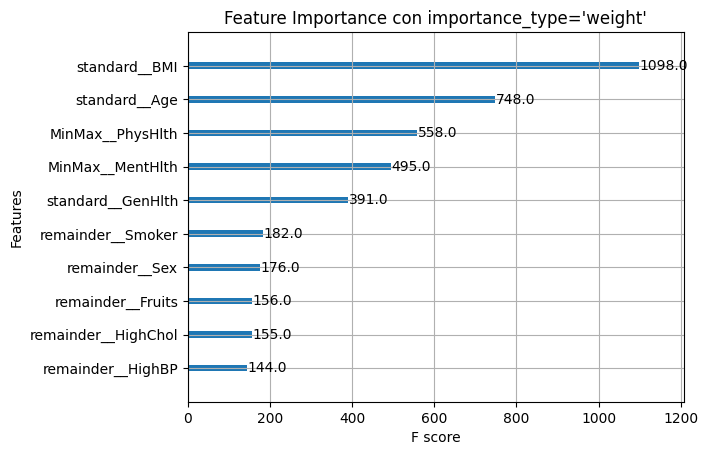

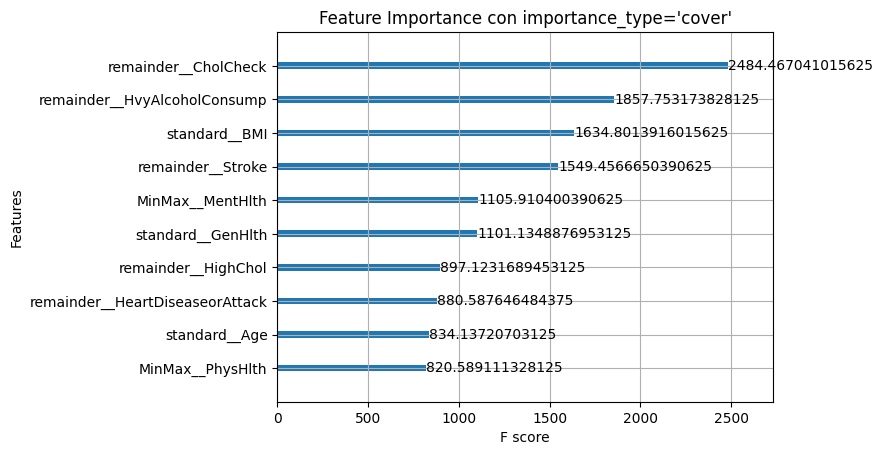

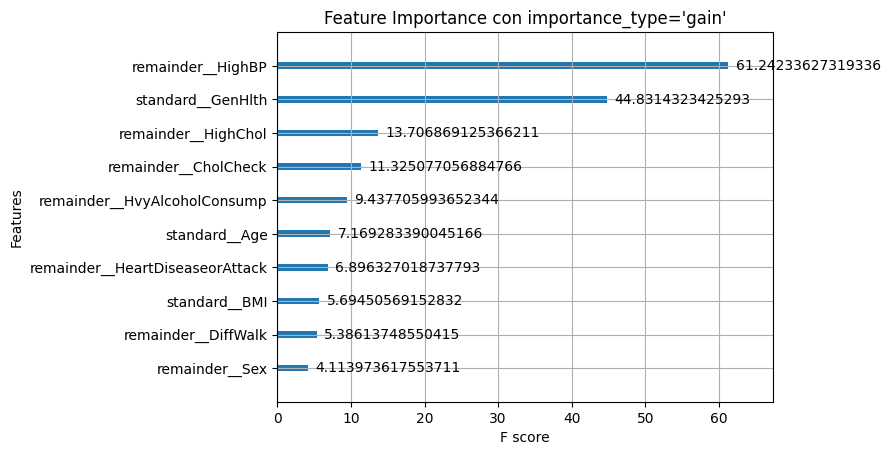

In [17]:
from xgboost.plotting import plot_importance
from matplotlib import pyplot as plt

clf = pipeline[-1]
feature_names = list(prepros.get_feature_names_out())
clf.get_booster().feature_names = feature_names

plot_importance(clf, title="Feature Importance con importance_type='weight'",
                max_num_features=10) #weight
plt.show()
plot_importance(clf, importance_type='cover',
                title="Feature Importance con importance_type='cover'", max_num_features=10)
plt.show()
plot_importance(clf, importance_type='gain',
                title="Feature Importance con importance_type='gain'", max_num_features=10)
plt.show()

Para el analisis es necesario clarificar los diferentes metodos:

* Weight (peso): Indica qué características son las más útiles para el modelo en términos de la cantidad de veces que se utilizan para tomar decisiones.---> es mayor si aparece en mas arboles
* Cover (cobertura): Indica la proporción de muestras que se ven afectadas por las divisiones realizadas en esa característica -- > nodos tienen mas hijos

* Gain (ganancia): Esta medida mide la mejora promedio de la función de pérdida obtenida al utilizar una característica para realizar divisiones. Es decir, indica cuánta ganancia de precisión aporta cada característica al modelo.---> es mayor si al usarse baja la funcion de perdida y por tanto aumenta la precision  

¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.

**R:** Los resultados reportan diferentes features en los tops para cada método lo cual es consistente con los resultados esperados atingentes a cada método, pues cada uno evalua un criterio distinto.


¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles?

**R:** No, pero ayudan a entender los criterios de decisión que utiliza XGB para clasificar. Esto se debe a que al no tener solamente variables categoricas binarias no es claro definir "el mejor valor" para cada criterio, por ej, si miramos el  criterio 'cover' se podria tener claridad de cual "divide mas", pero el top es "chequeo de colesterol" y solo dice si se cheoqueó o no y mirando esa misma lista, "BMI" esta en el top 3 y es una variable numerica y no hay claridad de la decision tomada.

¿Qué debilidad presenta este método?
* Las variables numericas siempre tienden a ser más importante al tener mas valores posibles y por tanto tienen mas presencia en los arboles lo que puede influir fuertemente en el criterio weight.
* En este caso no se ve, pero puede darse el caso en que las diferencias entre los tops de los features por los criterios no son realmente significativas lo que se traduce en que este método no se pueda usar para tener una interpretación clara.


## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [18]:
from sklearn.inspection import permutation_importance
import numpy as np

In [19]:
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

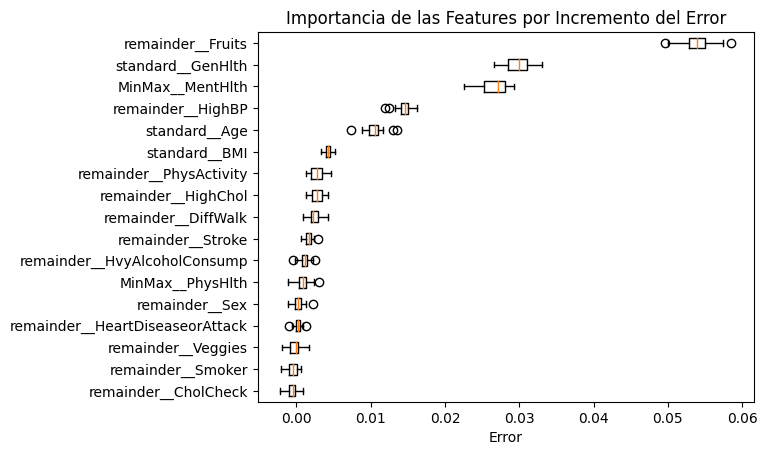

In [20]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?

**R:** Calcula la importancia de la caracteristica en base a como afecta permutar ésta al valor del error del modelo mediante la función de perdida.

- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?

**R:**
Top 5:
1. Fruits (Consume o no fruta): Si tiene sentido dado que el consumo de fruta habitual podria indicar una relación con el consumo azucar.   
2. GenHlth(Indicador de salud general[1,5]): Tiene sentido dado que una mayor salud general se puede esperar que haya menos probabilidad de diabetes, al tener mejores habitos presuntamente.
3. MentHlth(Salud mental[0,30].norm): Tiene sentido, dado que factores como la ansiedad pueden afectar al consumo desmedido de alimentos.  
4. HighBP (Tiene presion alta o no): Tiene sentido por que la diabetes produce presión alta, por tanto es una variable con una correlación esperada pero no una causalidad directa.
5. Age (edad): Tiene sentido dado que tipicamente los pacientes con diabetes son mayores de 40 .

En resumen, las features en el top se presume que tienen alta influencia en la presencia de diabetes.
Esto tambien se deduce del hecho de


Es cuanto aumenta el error al permutar la car

- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

**R:** Cambian completamente dado que la interpretabilidad está ligada complemente a la presencia o no de la feature, siendo claro que si las features con mayor error no estan presentes el modelo predice peor por tanto son mas influyentes al momento de tomar la decision y esto no era tan claro con el método anterior dado que se tomaban los valores de cada feature mas que su aparición.

- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

Ventajas:

* Facil interpretacion
* Alta comprension de interpretabilidad global
* Comparable con diferentes modelos

Desventajas:
* Enlazado al error del modelo
* Sensible a la correlacion de las features
* Requiere acceso a la gold label


Respecto a las desviaciones, se observa que todas tinene un valor inferior a 0.0021, lo cual nos dice que en general son bajas para las 17 features estudiadas

Text(0, 0.5, 'desv estandard')

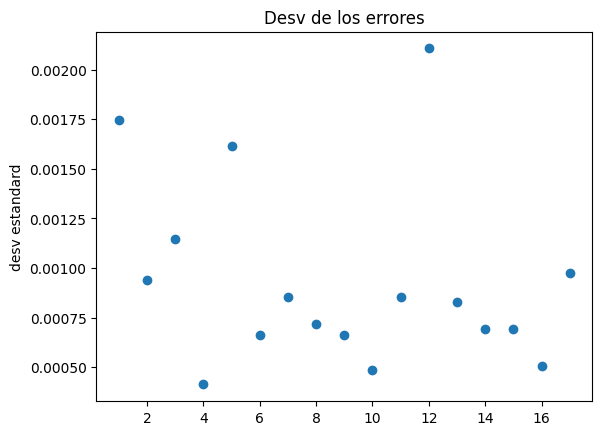

In [21]:
plt.scatter(range(1,18),result['importances_std'])
plt.title('Desv de los errores')
plt.ylabel('desv estandard')

In [22]:
result['importances_std']

array([0.0017462 , 0.00094123, 0.00114494, 0.00041339, 0.00161541,
       0.00066409, 0.00085314, 0.00071615, 0.00066135, 0.00048716,
       0.00085593, 0.00210675, 0.00082978, 0.00069058, 0.00069454,
       0.00050736, 0.00097744])

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [23]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.4 MB/s eta 0:00:00


In [24]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [25]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [30]:
shap_values

.values =
array([[ 0.1258604 , -0.13439   ,  0.30619603, ..., -0.05124884,
        -0.02942907,  0.27074623],
       [ 0.21791574, -0.10159023,  0.69060117, ..., -0.0341708 ,
         0.16824752,  0.38053718],
       [ 0.17128178,  0.02506649,  0.36716026, ..., -0.04374804,
        -0.00307044, -0.2899699 ],
       ...,
       [ 0.27261877,  0.06689583,  0.35907924, ..., -0.09935851,
        -0.01877327,  0.52451813],
       [ 0.2954156 , -0.04679168,  0.5742394 , ..., -0.09253889,
        -0.03179854,  0.4717251 ],
       [ 0.38441747,  0.17973417,  0.43675104, ...,  0.01354741,
        -0.02180508,  0.37812558]], dtype=float32)

.base_values =
array([-0.00853544, -0.00853544, -0.00853544, ..., -0.00853544,
       -0.00853544, -0.00853544], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

Los shap_values calculados representan:
* base_values =  Cada ejemplo tiene su propio valor base, este indica el punto de referencia para comprender cómo contribuyen las características de un ejemplo concreto a la predicción del modelo para ese ejemplo.
* values = se expresan en función del valor base como centro y cada ejemplo tiene tantos values como features tenga la data, su valor como tal en cada feature indica que tanto aporta para la predicción de ese ejemplo esa caracteristica, con respecto al valor base.
* data: es una copia del total de la data.


### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [31]:
# Inserte código para generar gráficos de aporte local aquí

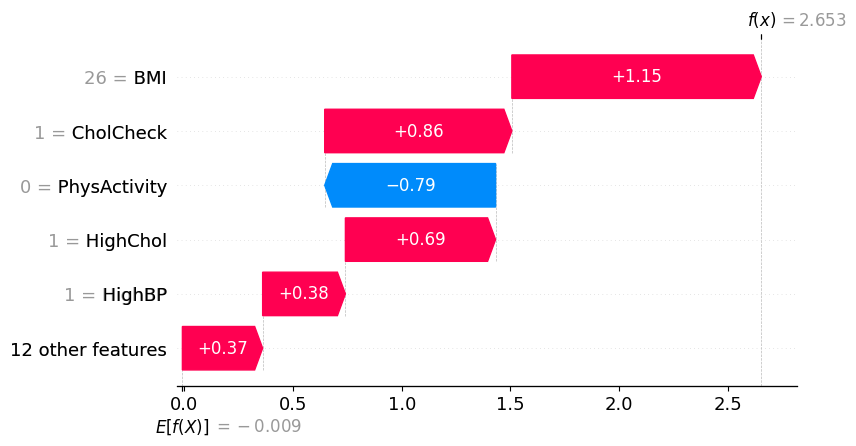

In [32]:
idx = 1

shap.initjs()
shap.plots.waterfall(shap_values[idx,:],
                     max_display=6)

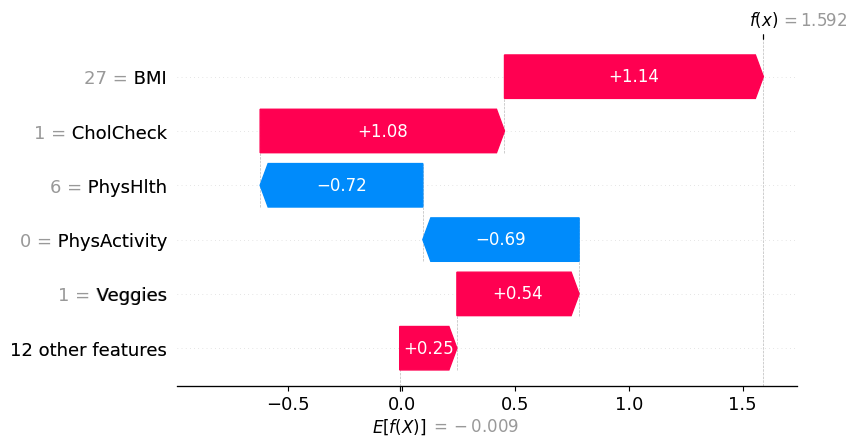

In [33]:
idx = 9

shap.initjs()
shap.plots.waterfall(shap_values[idx,:],
                     max_display=6)

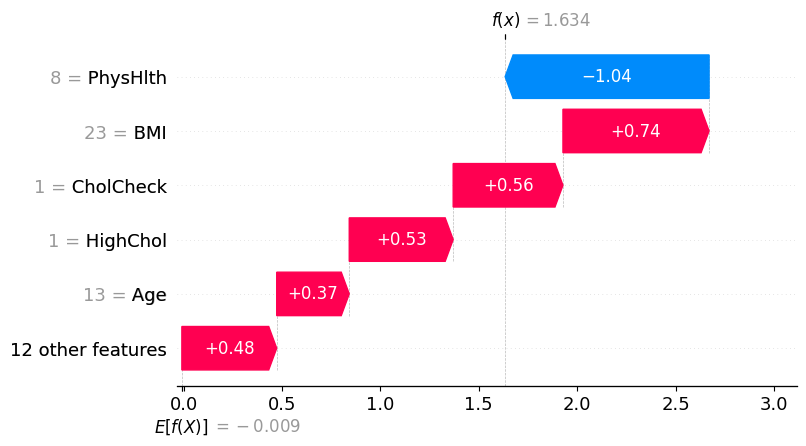

In [34]:
idx = 150

shap.initjs()
shap.plots.waterfall(shap_values[idx,:],
                     max_display=6)

Analizando los 5 features mas importantes para los ejemplos solicitados:


¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
**R:**
1.  
+ BMI:  un indice de masa corporal de 26 afecta positivamente a tener diabetes
+ CholCheck: hacerse el chequeo de colesterol aporta a tener diabetes
-  PhysActivity: No hacer actividad física aporta negativamente.
+ HighBP: tener presión alta aporta positivamente a tener diabetes

9.
+ BMI: tener un indice de masa corportal de 26 le aporta a tener diabetes.
+ CholCheck: de 1 aporta a tener diabetes
- PhysHlth: de 6 le aporta negativamente a tener diabetes
- PhysActivity: de 0 le aporta negativemente a tener diabetes
+ Veggies: Consumir vegeteles le aporta positivamente a tener diabetes

150.
- PhysHlth  de 8 le aporta negativemente a tener diabetes
+ BMI de 23 le aporta positivamente a tener diabetes
+ CholCheck de 1 le aporta positivamente a tener diabetes
+ HighChol de 1 le aporta positivamente a tener diabetes
+ Age de 13 (maximo en el rango) le aporta positivamente a tener diabetes


¿Existe algún patrón común entre las instancias analizadas?

**R:**
En generak BMI alto, hacerse el chequeo de colesterol, aportan a tener diabetes, en cambio tener PhysActivity en 0 aporta negativamente a tener diabetes (a no tener).

¿Es posible generalizar estas conclusiones a todo el dataset?

**R:**
No, pero son un punto de referencia adecuado para entender el problema. Para generalizar sería necesario estudiar un número mayor de muestras y observar sus tendencias.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [35]:
# Inserte código para generar gráficos de aporte global aquí

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


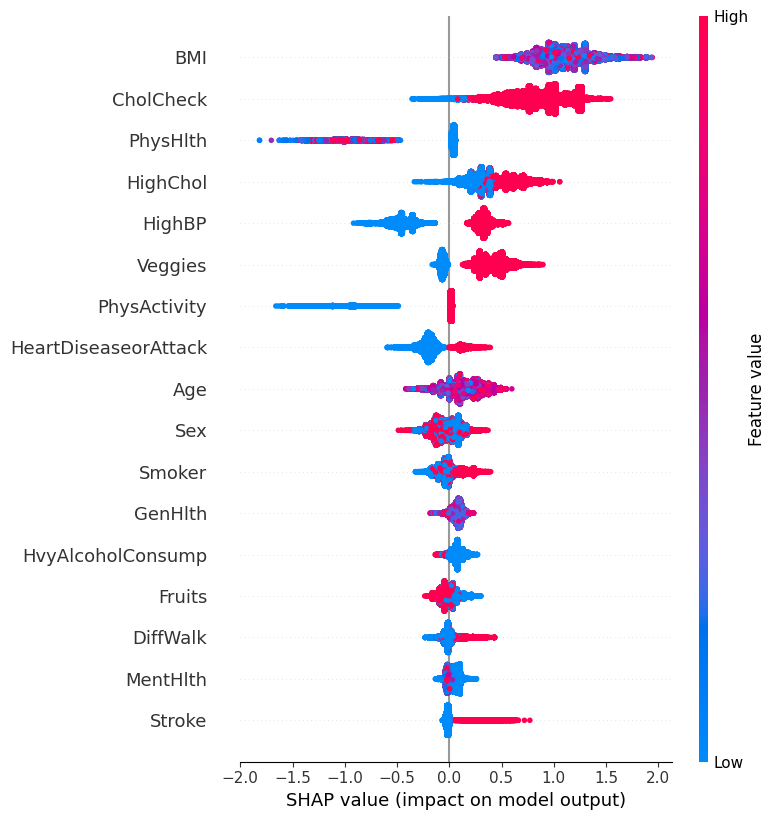

In [36]:
shap.summary_plot(shap_values, X)

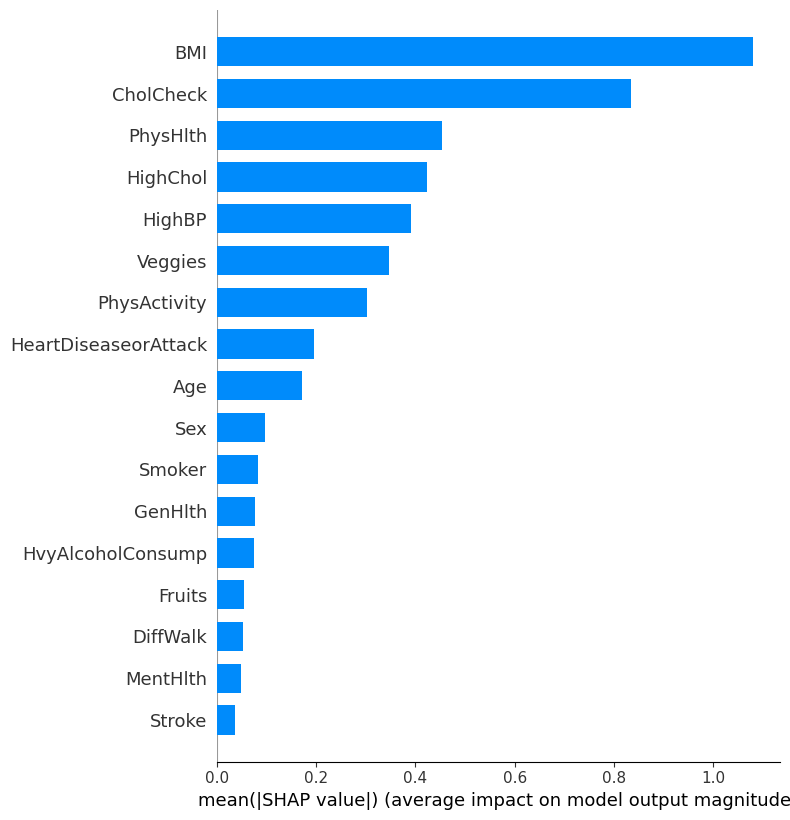

In [37]:
shap.summary_plot(shap_values, X, plot_type="bar")

Los resultados si representan las tendencias del conjunto de datos por lo que son una fuente mas confiable para entender el problema que el analisis de casos particulares.

En particular, esta grafica confirma la influencia positiva del BMI, CholCheck y HighBP en la predicción de tener diabetes y, en su contraparte, PhysHlth y PhysActivity aportan negativamente a tener diabetes.

Tambien se observan las variables que están en el centro principalmente que serían aquellas variables que no son realmente significativas al momento de tomar la desición como lo son Smoker, DiffWalk, MentHlth, Sex, entre otras.

A su vez, tambien se ve la importancia global de cada feature, siendo mostradas desde las mas importantes a las menos importantes de arriba hacia abajo.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [38]:
# Inserte código para generar gráficos de feature vs shap value aquí

In [39]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X.columns[shap_values_abs.argsort()[::-1]]
feature_importance_names[:5]

Index(['BMI', 'CholCheck', 'PhysHlth', 'HighChol', 'HighBP'], dtype='object')

In [41]:
pred = pipeline.predict(X)

BMI


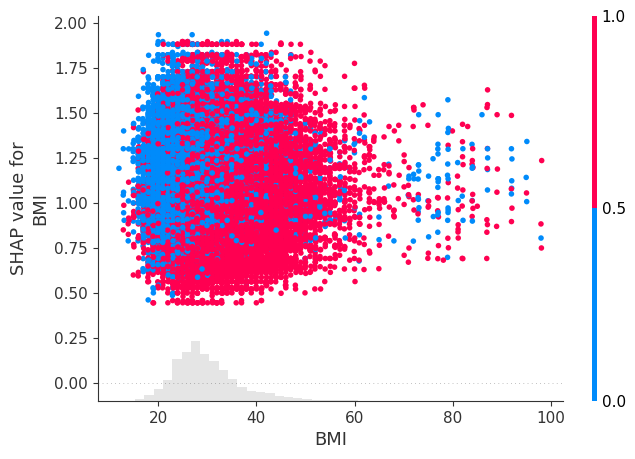

CholCheck


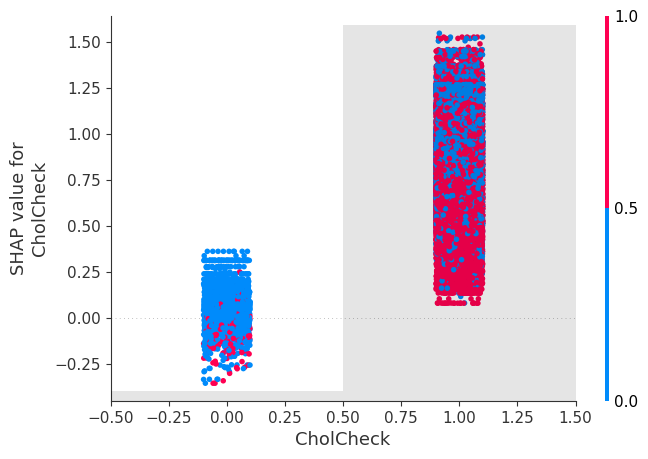

PhysHlth


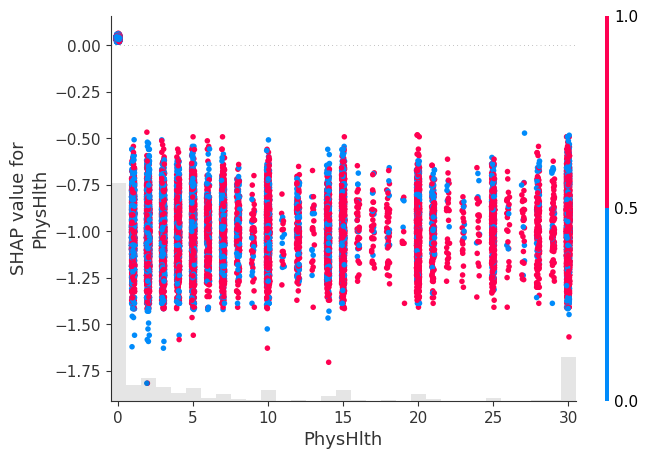

HighChol


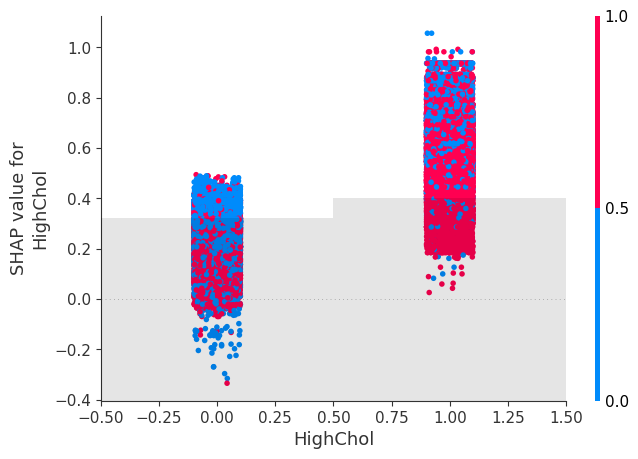

HighBP


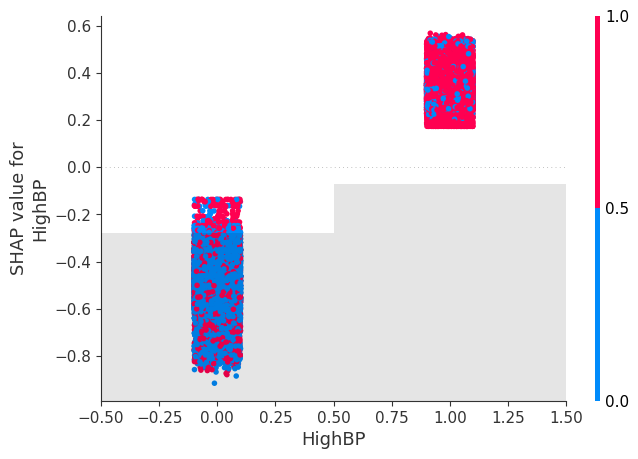

In [43]:
for name in feature_importance_names[:5]:
    print(name)
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],
                   color=pred)#, xmin=0)

¿Qué puede concluir de sus resultados?

**R:**
De los Scatter plot de los shap_values mostrados definiendo como el color llas predicciones sobre el conjunto, se puede concluir que:
* En las variables HighBP, HighChol, Chol Check vs sus respectivos Shap values es claro ver una distinción entre un valor y otro, siendo dominantemente 0 en sus respectivas features asociada a no tener diabetes y el 1 a tener diabetes.
  * Además se ven particularidades como que en HighBP de 0 y label sin diabates tiene shap values de magnitud mayor y signo negativo que su contrarte de valor 1 con la label diabetes, es decir, tener un 0 en esta variable tiene mayor influencia en la desición de no tener diabetes que tener 1 en la desición de tener diabetes.
  
* En BMI, dado la gran dispersión de valores la forma que se crea con los valores de los shap values es una nube, de la cual se desprende claramente que a mayores BMI hay mayor presencia de sujetos con diabetes.

* Para la variable PhysHlth es dificil observar una tendencia objetiva pero se podría decir que hay mayores ejemplos con diabetes a mayor valor de PhysHlth.



### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [44]:
# Inserte código para generar gráficos PDP aquí

BMI


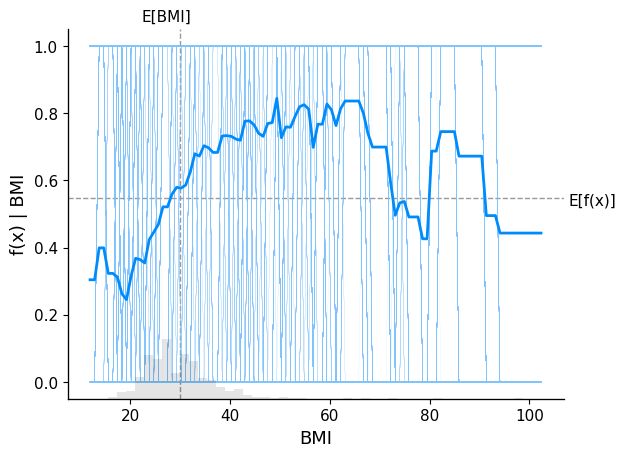

CholCheck


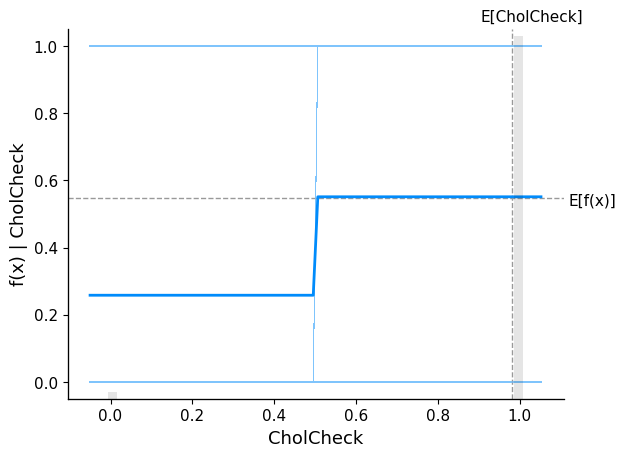

PhysHlth


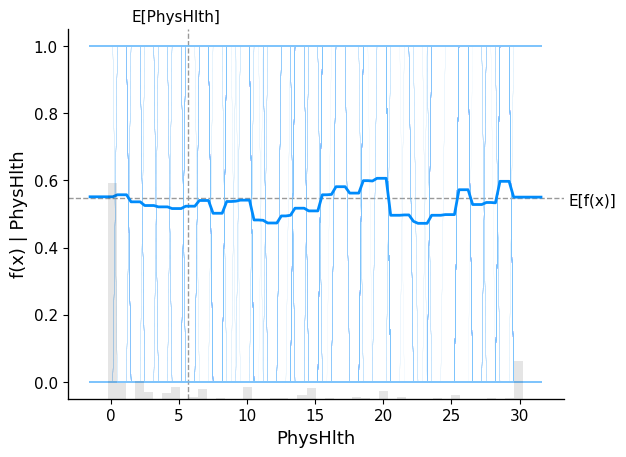

HighChol


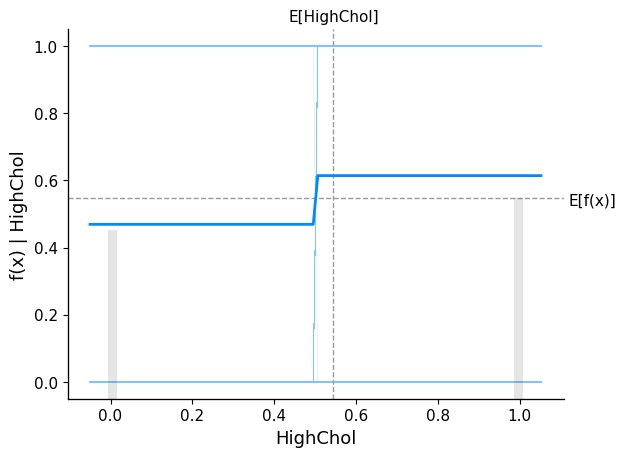

HighBP


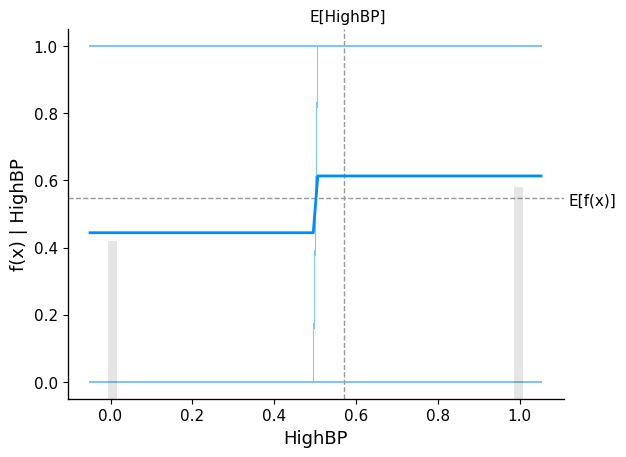

In [45]:
X1000 = shap.utils.sample(X, 1000)
# sample_ind=15
for name in feature_importance_names[:5]:
  print(name)
  shap.partial_dependence_plot(
      name, pipeline.predict, X1000, model_expected_value=True,
      feature_expected_value=True, ice=True,
      # shap_values=shap_values[sample_ind:sample_ind+1,:]
  )
#como cambia la función en medida de que solo cambias el BMI

¿Qué relación existe entre la salida promedio del modelo y cada feature analizada?

BMI
* Se desprende el gráfico que para los rangos de BMI 20 a 70 la correlación tiende a ser directa con respecto a "si aumenta el BMI, aumenta la probabilidad de tener diabetes", en los rangos siguientes no hya consistencia en la observación como para inferir una correlación.


CholCheck
* Esta feature tiene solo 2 valores, 1 y 0, del grafico se observa que para el valor 0 el efecto en la desición tiende a indicar que no se tiene diabetes, en cambio, para el valor 1 se tiene como resultado un 0,5 lo cual indica que esta feature no es decisiva al momento de entregar una respuesta.

PhysHlth
* Del gráfico se desprende que en general independiente del rango en que oscila esta variable, la esperanza del modelo oscila entre el valor el medio, es decir, no es decisiva.  


HighChol
* Esta variable igual es binaria, y el 0 tiende levemente a la desición no tener diabetes y el 1 a tener diabetes, pero su impacto es bajo.

HighBp
* Ocurre algo similar al caso anterior, pero el impacto del valor 0 es un poco mayor en la desición de "no tener diabetes" que el caso contrario.


¿Son estas conclusiones generalizables para todo el conjunto de datos?

**R:**
Si, dado que se realiza el analisis sobre un numero consirable de muestras que son representativas el conjunto completo y reflejan las tendencias.


## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [46]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00


In [47]:
from alibi.explainers import AnchorTabular

In [71]:
X_test_t = prepros.transform(X_test)
X_train_t = prepros.transform(X_train)

In [75]:
clf = pipeline[-1]
predict_fn = lambda x: clf.predict(x)
explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=1)
explainer.fit(X_train_t)

class_names = ["No_tiene_diabetes", "Tiene_diabetes"]

def explicacion_id(id):
  print(f'Explicacion id:{id}')
  explanation = explainer.explain(X_test_t[id], threshold=0.95)
  print('Prediction: ', class_names[explainer.predictor(X_test_t[id].reshape(1, -1))[0]])
  print('Anchor: %s' % (' AND '.join(explanation.anchor)))
  print('Precision: %.2f' % explanation.precision)
  print('Coverage: %.2f' % explanation.coverage)
  print('----------------------------------------------------------------------')

In [76]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
explicacion_id(idx)

# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001
explicacion_id(idx)
idx = 5751
# explicar predicción idx 5751
explicacion_id(idx)

Explicacion id:1000
Prediction:  Tiene_diabetes
Anchor: standard__GenHlth > -0.75 AND remainder__HighChol > 0.00 AND standard__Age > 0.15 AND MinMax__PhysHlth <= 0.17
Precision: 0.96
Coverage: 0.11
----------------------------------------------------------------------
Explicacion id:3001
Prediction:  No_tiene_diabetes
Anchor: standard__Age <= -0.55 AND remainder__HighBP <= 0.00 AND standard__BMI <= -0.12 AND standard__GenHlth <= 0.14
Precision: 0.99
Coverage: 0.12
----------------------------------------------------------------------
Explicacion id:5751
Prediction:  Tiene_diabetes
Anchor: standard__BMI > 0.45 AND remainder__HighBP > 0.00 AND standard__GenHlth > -0.75
Precision: 0.98
Coverage: 0.14
----------------------------------------------------------------------


 Con las reglas propuestas señale a cuánta población es posible explicar con estas reglas e indique la precisión que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

 Las reglas para cada uno de estos ejemplos especificos son consistentes a las ya explicadas mediante otros metodos en la parte 5.c de este laboratorio con indicaciones como BMI altas y PhysHlth baja asociado a tener diabates y viceversa.

 Respecto a la precisión alta se presume que este indica que al cumplirse ese conjunto de reglas le decisión esta asociada a la predicción correspondiente, por tanto hay muy pocos ejemplos en los que se tienen esta regla y no coincide con la prediccion esperada, esto para todos los indices revisados.

 Respecto al Coverage de valores indica que en general hay menos del 15% de los datos que cumplen exactemente estas reglas, para cada conjunto, por tanto en terminos de generalización, podemos concluir que estos conjuntos de reglas por si solos no son suficientes para establecer una buena generalización sobre el conjunto de datos.  



# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

 * Las features importance no son tan representativas por si solo dado que son dependientes del criterio analizado y de los posibles valores de las variables.

* Los metodos agnosticos globales son mejores al analizar el impacto de la presencia de la feature independientemente de sus valores posible,
al ser una revision global se tiene una mejor confianza de los resultados locales, a pesar del numero de muestras, entregando una interpretablidad mas confiable.

* Los Shap Values Sirven para entender de forma local y global el impacto de cada feature para ambas decisiones, entregando herramientos como los waterfall, summary plot, scatter sobre variables individuales y los PDP que permiten analizar localmente  el impacto de una variable con respecto al total de variables en su espectro completo de valores posibles.

* El sistema de reglas por si solo permite entender el camino que ocupa el modelo para tomar la decision en particular lo cual es util para el ejemplo pero es limitado para una comprensión global.


Dado que el Dr Simi quiere un buen modelo que a su vez tenga un buen enfoque en la interpretabildidad, los Shap Values son la herramienta mas completa al momento de realizar el analisis de la relevancia de las caracteristicas.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>